# Краткое описание проекта


    - Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
# Цель проекта
    - Проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
# План работы
     - Шаг 1. Загрузка данных
     - Шаг 2. Предобработка данных
     - Шаг 3. Исследовательский анализ данных
     - Шаг 4. Составим портрет пользователя каждого региона (NA, EU, JP)
     - Шаг 5. Проверим гипотезы
     - Шаг 6. Общий вывод
# Описание данных 
     - Name — название игры
     - Platform — платформа
     - Year_of_Release — год выпуска
     - Genre — жанр игры
     - NA_sales — продажи в Северной Америке (миллионы проданных копий)
     - EU_sales — продажи в Европе (миллионы проданных копий)
     - JP_sales — продажи в Японии (миллионы проданных копий)
     - Other_sales — продажи в других странах (миллионы проданных копий)
     - Critic_Score — оценка критиков (максимум 100)
     - User_Score — оценка пользователей (максимум 10)
     - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Откроем файл с данными и изучим общую информацию.

In [1]:
#Сразу импортируем нужные нам библиотеки
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На первом шаге мы считали данные, ознакомились с содержанием данных, посмотрели у каких столбцов нужно поменять тип данных.

## Шаг 2. Подготовка данных.

In [4]:
#Приведем названия столбцов к нижнему регистру.
df = df.rename(columns=lambda x: x.lower())
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Удалим строки, где не указанно название игры и жанр таких строк всего 2 и проверим
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Пропуски в столбцах с оценками пользователей и критиков не буду заполнять, чтобы данные были максимально достоверными, а заполнение средним или медианой в данном случае может негативно повлиять на результаты исследования.

In [6]:
#приведем столбец с датой к типу данный int
#Для этого сначала удалим 269 строк с пропусками
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)

In [7]:
#поменяем тип данных столбца оценки пользователей на float, возможно это пригодится для анализа.
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN #изменим значение tbd на Nan.
df['user_score'] = df['user_score'].astype(float)

Аббревиатура  'tbd' в столбце user_score означает (to be determined = будет определено). То есть в скором времени у может появиться информация поэтому пока что эти значения заполним пропусками.

In [8]:
#Проверяем тип данных
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
#Проверим данные на явные дупликаты
df.duplicated().sum()

0

In [11]:
#сделаем проверку на наличие неявных дубликатов (совпадающие по названию, платформе и году релиза одновременно).
df[['name', 'platform', 'year_of_release']].duplicated().sum()

1

In [12]:
#Удалим дупликат
df.drop_duplicates(['name', 'platform', 'year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
#Добавим столбец с суммарной продажей во всех регионах
df['all_sales'] = df['na_sales'] +  df['eu_sales'] +  df['jp_sales'] +  df['other_sales']
#Проверяем
df.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


#### Вывод: на втором этапе мы провели подготовку данных к анализу, а именно:привели названия столбцов к нижнему регистру, удалили строки, где не указанно название игры и жанр, привели столбец с датой к типу данный datetime64, поменяли тип данных столбца оценки пользователей на float, проверили датафрейм на дупликаты и добавили столбец с сумарными продажами во всех регионах.

## Шаг 3. Исследовательский анализ данных.

### Рассмотрим сколько игр выпускалось в разные годы

In [14]:
#Сгруппируем данные по годам

In [15]:
df.groupby(['year_of_release']).agg({'name':'count'})

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


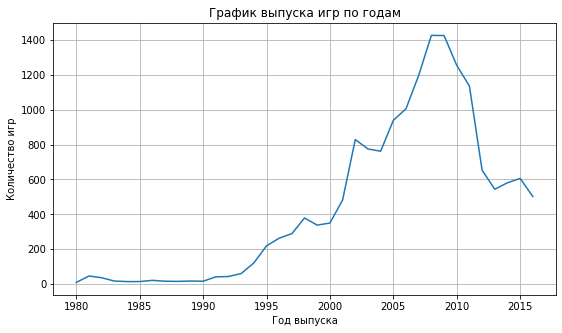

In [16]:
df.groupby(['year_of_release']).agg({'name':'count'}).plot(grid=True, figsize=(9, 5), xlabel='Год выпуска', ylabel='Количество игр', title='График выпуска игр по годам', label='Количество выпущенных игр', legend=False);

На графике мы видим, что с 1990 по 2006-7 количество выпущенных игр в год активно росло, а с 2007 по 2015 пошел резкий спад

### Рассмотрим как менялись продажи по платформам

#### Сгруппируем данные по платформам

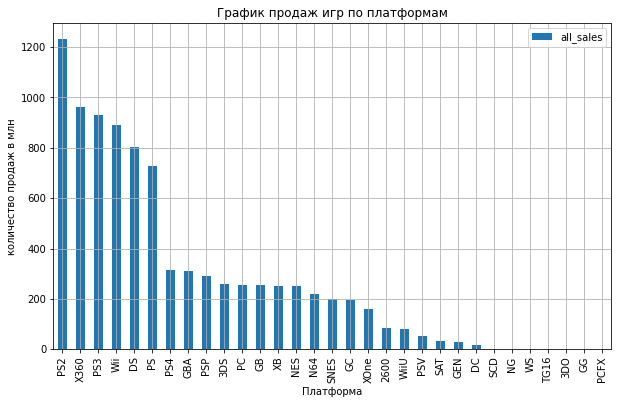

In [17]:
#Сгруппируем методом groupby, отсортируем по убыванию и построим график.
df.groupby(['platform']).agg({'all_sales':'sum'}).sort_values(by='all_sales', ascending=False).plot(grid=True, kind='bar', figsize=(10, 6), title='График продаж игр по платформам', xlabel='Платформа', ylabel='количество продаж в млн');

На графике видно, что явный лидер PS2 с продажами более 1200 млн, далее идет X360, PS3, Wii, DS, PS

#### Выберем платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS и построим распределение продаж по годам.

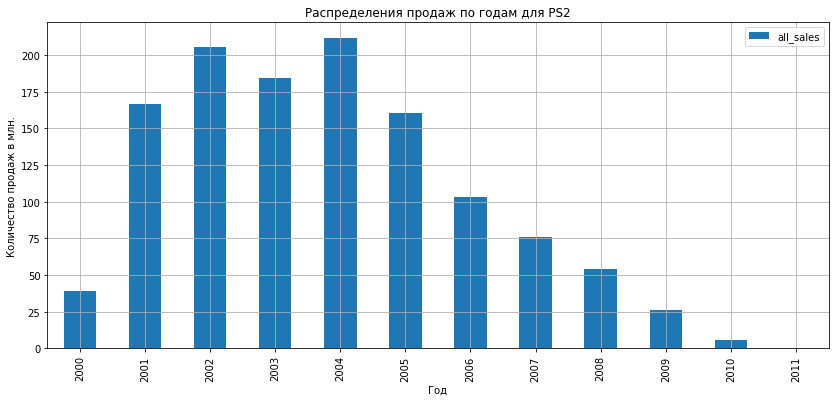

In [18]:
#Построим график распределения продаж по годам для PS2
df.query('platform == "PS2"').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar', figsize=(14, 6), grid=True, xlabel='Год', ylabel='Количество продаж в млн.', title='Распределения продаж по годам для PS2');

Из графика распределения продаж по годам мы видим, что с 2001 по 2004г. платформа набирала популярность и было увеличение продаж, а после пошел спад и к 200-9г платформа практически потеряла популярность

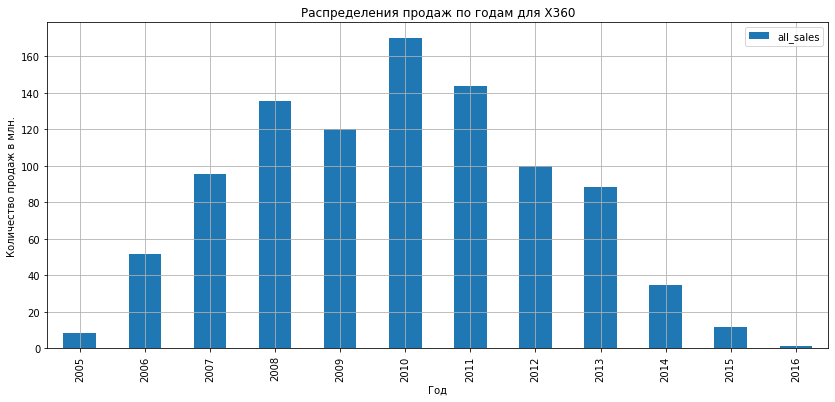

In [19]:
##Построим график распределения продаж по годам для X360
df.query('platform == "X360"').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar', figsize=(14, 6), grid=True, xlabel='Год', ylabel='Количество продаж в млн.', title='Распределения продаж по годам для X360');

Из графика распределения продаж по годам для X360 видно, что с 2005 платформа набирала популярность и в 2010 был пик продаж, а далее поше спад и к 2014г. про платформу почти забыли

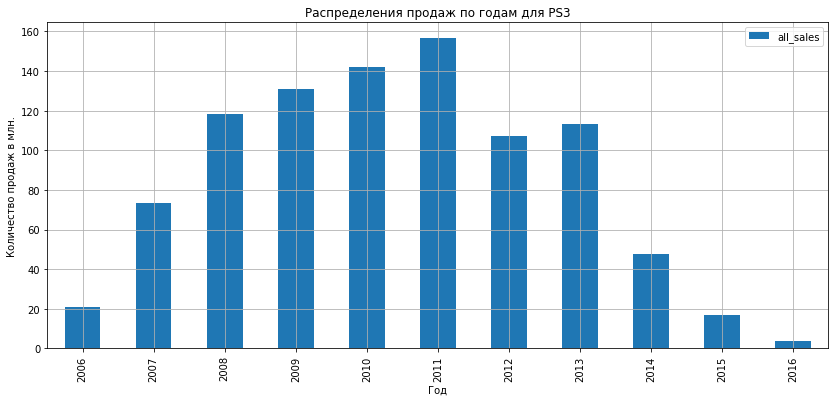

In [20]:
#Построим график распределения продаж по годам для PS3
df.query('platform == "PS3"').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar', figsize=(14, 6), grid=True, xlabel='Год', ylabel='Количество продаж в млн.', title='Распределения продаж по годам для PS3');

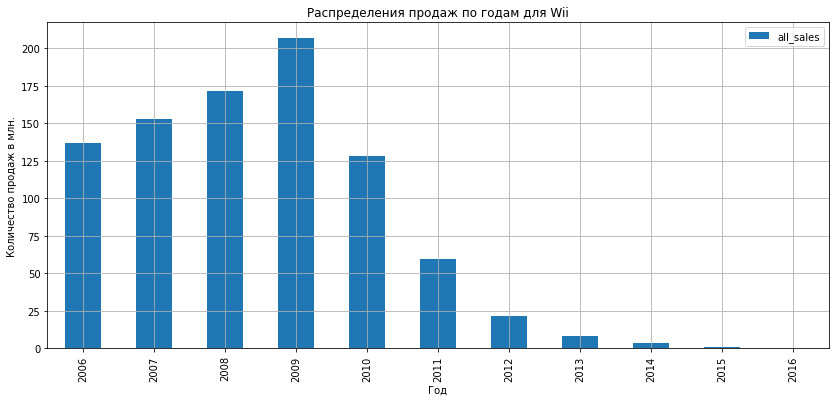

In [21]:
#Построим график распределения продаж по годам для Wii
df.query('platform == "Wii"').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar', figsize=(14, 6), grid=True, xlabel='Год', ylabel='Количество продаж в млн.', title='Распределения продаж по годам для Wii');

Из графика распределения продаж по годам для Wii видно, что начиная с 2006 года была популярна и до 2009 набирала популярность, а после пошел резкий спад и к 2012г. стала практически не актуальна для пользователей.

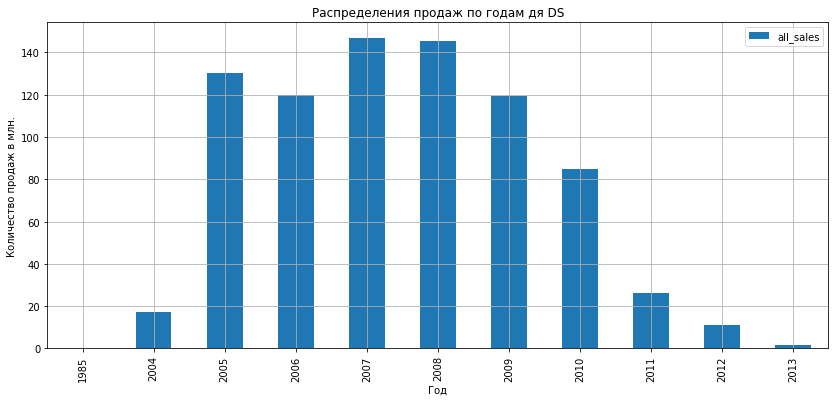

In [22]:
#Построим график распределения продаж по годам для DS
df.query('platform == "DS"').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar', figsize=(14, 6), grid=True, xlabel='Год', ylabel='Количество продаж в млн.', title='Распределения продаж по годам дя DS');

Из графика распределения продаж по годам для DS мы видим, что платфрма с 2005-9г. была популярна с пиками продаж 2007-8г, к 2012 году потеряла популярность.

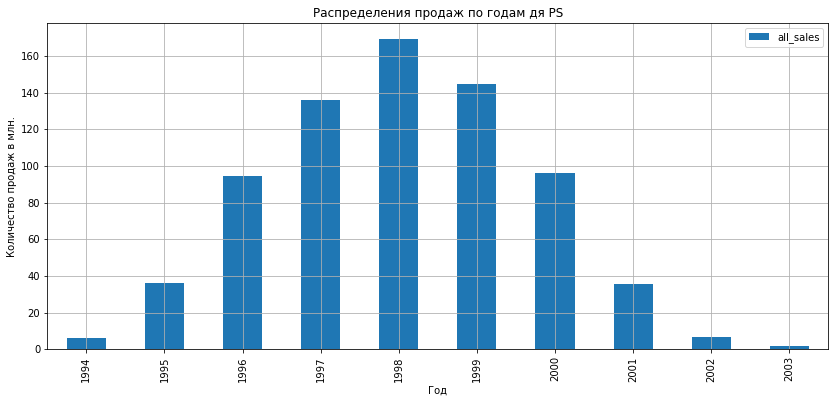

In [23]:
#Построим график распределения продаж по годам для PS
df.query('platform == "PS"').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar', figsize=(14, 6), grid=True, xlabel='Год', ylabel='Количество продаж в млн.', title='Распределения продаж по годам дя PS');

На графике распределения продаж по годам для PS видим, что начиная с 94 по 98 платформа активно набирала популярность, а после 98 года продажи начали уменьшаться и к 2002 году практически сошли на нет.

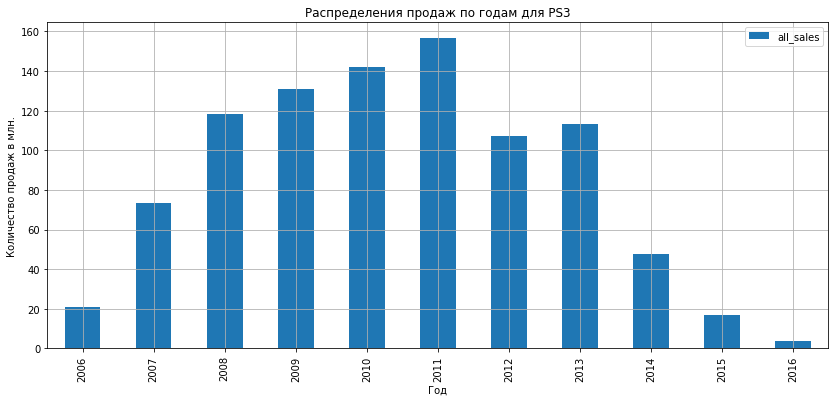

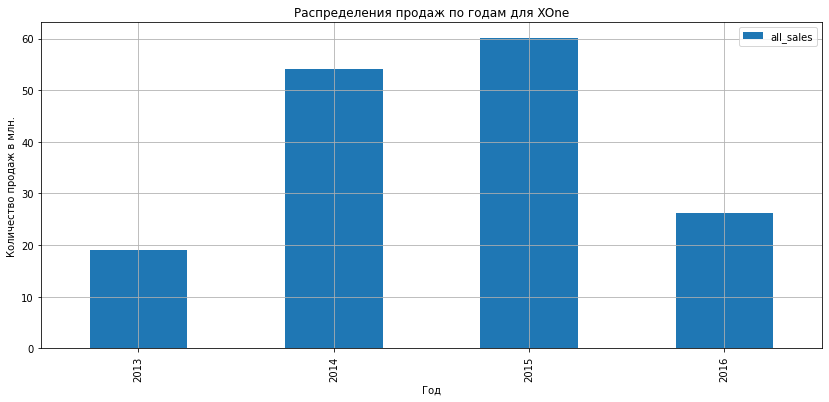

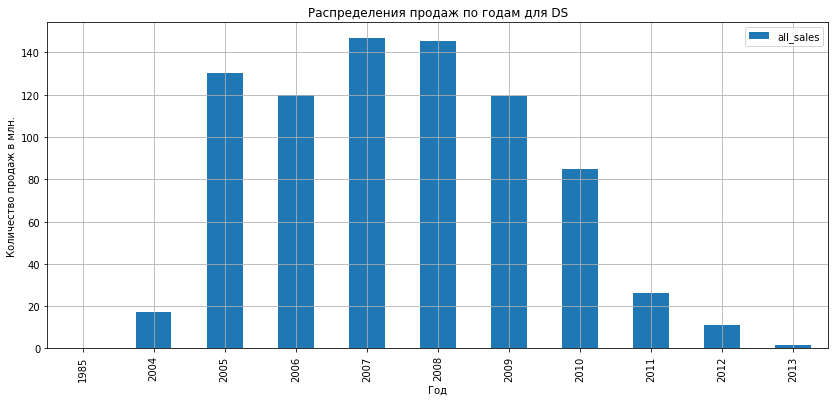

In [24]:
# код ревьюера
for platform in ['PS3', 'XOne', 'DS']:
    
    df.query('platform == @platform').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar'
                                                                                                 , figsize=(14, 6)
                                                                                                 , grid=True
                                                                                                 , xlabel='Год'
                                                                                                 , ylabel='Количество продаж в млн.'
                                                                                                 , title=f'Распределения продаж по годам для {platform}');

#### Вывод: мы рассмотрели графики распределения продаж самых популярних платформ по годам и можем сказать, что платформа держит актуальность в среднем 5-6 лет, после чего появляется новая, а старая становится не актуальна.

### Возьмем данные за соответствующий актуальный период 2013-2016г. и рассмотрим какие платформы лидируют по продажам.

In [25]:
#Возьмем срез данных за 2013-2016 год
df_actual = df.query('year_of_release >= 2013')
df_actual['year_of_release'].unique() #Проверим уникальность года

array([2013, 2015, 2014, 2016])

In [26]:
#проверим наш срез
df_actual.head(8)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36


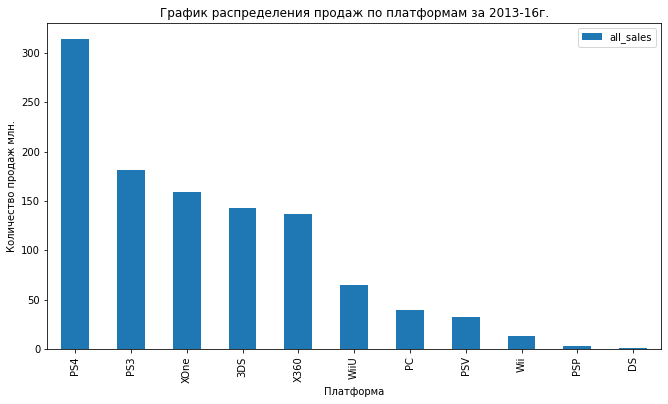

In [27]:
#Построим график распределения продаж по платформам за 2013-16г.
df_actual.groupby(['platform']).agg({'all_sales':'sum'}).sort_values(by='all_sales', ascending=False).plot(kind='bar', figsize=(11, 6), xlabel='Платформа', ylabel='Количество продаж млн.', title='График распределения продаж по платформам за 2013-16г.');

Из графика мы видим, что к нашим популярным платформам добавились новые: PS4, XOne, 3DS и WiiU, рассмотрим распределение продаж по годам для этих платформ.

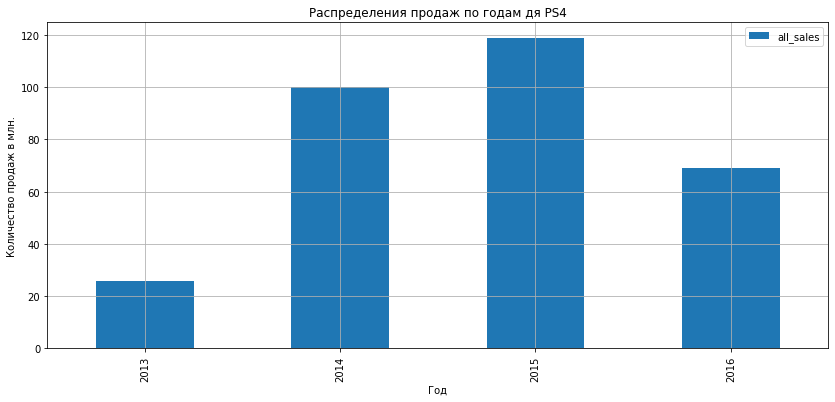

In [28]:
#Рассмотрим PS4
df_actual.query('platform == "PS4"').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar', figsize=(14, 6), grid=True, xlabel='Год', ylabel='Количество продаж в млн.', title='Распределения продаж по годам дя PS4');

На графике видим, что PS4 появилась в 2013 году и набирает свою популярность с каждым годом.

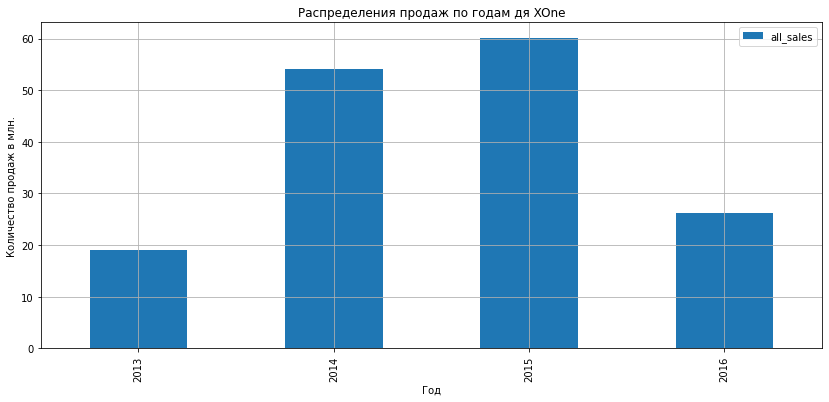

In [29]:
#Рассмотрим платформу XOne 
df_actual.query('platform == "XOne"').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar', figsize=(14, 6), grid=True, xlabel='Год', ylabel='Количество продаж в млн.', title='Распределения продаж по годам дя XOne');

На графике мы видим, что Xone появилась в 2013 году и начала набирать свою популярность, можно сделать прогноз, что данная платформа будет набирать свою популярность до 2017-18г. а затем пойдет на спад.

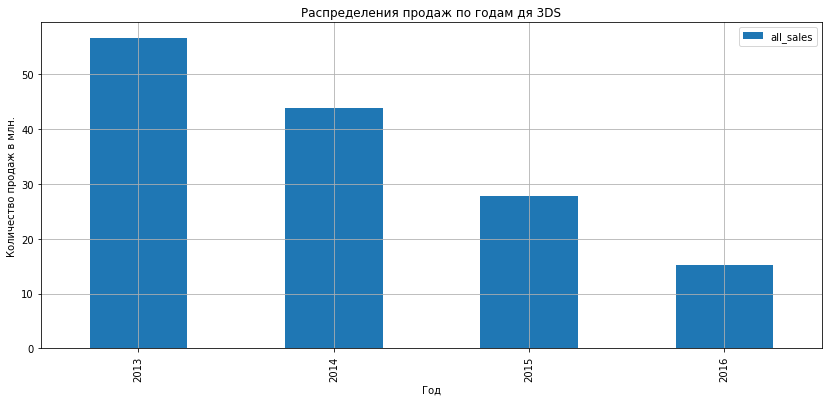

In [30]:
#Рассмотрим платформу 3DS
df_actual.query('platform == "3DS"').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar', figsize=(14, 6), grid=True, xlabel='Год', ylabel='Количество продаж в млн.', title='Распределения продаж по годам дя 3DS');

На графике видно, что популярность платформы стремительно снижается и вскоре она станет сосвсем не актуальна.

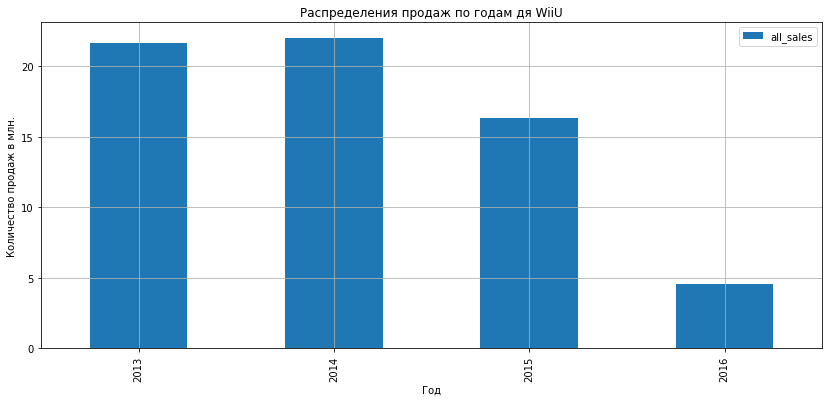

In [31]:
#Рассмотрим платформу WiiU
df_actual.query('platform == "WiiU"').groupby(['year_of_release']).agg({'all_sales':'sum'}).plot(y='all_sales', kind='bar', figsize=(14, 6), grid=True, xlabel='Год', ylabel='Количество продаж в млн.', title='Распределения продаж по годам дя WiiU');

На графике мы видим, что продажи платформы снижаются и скоро она станет совсем не актуальна.

#### Вывод: проанализировав графики за актуальный период 2013-2016г. мы выделили несколько новых платформ: PS4, XOne, 3DS и WiiU. Можно сказать, что платформа PS4 явный лидер по продажам, появившаяся в 2013 году, которая будет набирает свою популярность и будет актуальна до 2018-19 года. Платформа XOne также появилась в 2013 году и набирает свою популярность. Платформы: 3DS и WiiU, с каждым годом теряют продажи и скоро станут не актуальны.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.

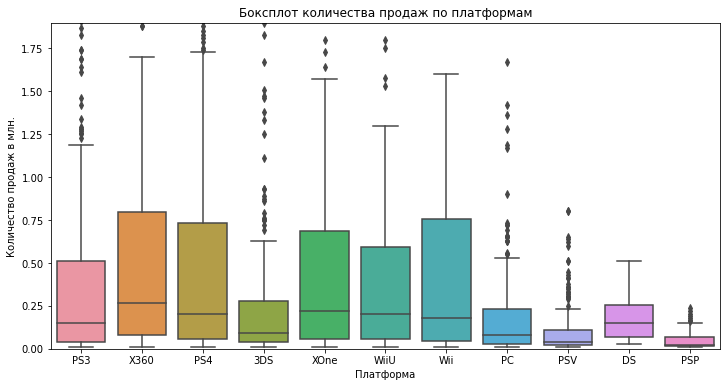

In [32]:
plt.figure(figsize=(12,6))
plt.ylim(0, 1.9)
sns.boxplot(x=df_actual['platform'], y=df_actual['all_sales'], data=df_actual).set (title='Боксплот количества продаж по платформам');
plt.xlabel('Платформа')
plt.ylabel('Количество продаж в млн.');

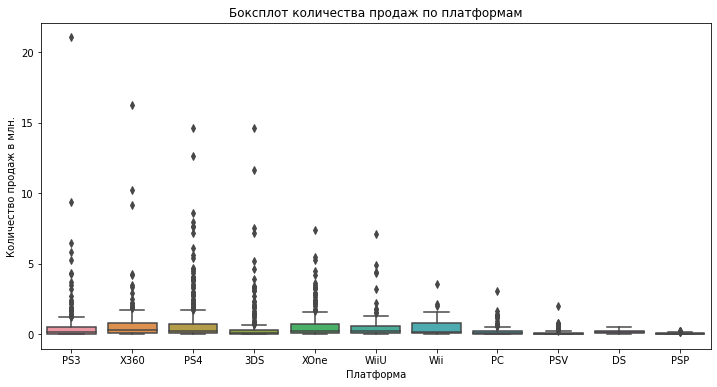

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_actual['platform'], y=df_actual['all_sales'], data=df_actual).set (title='Боксплот количества продаж по платформам');
plt.xlabel('Платформа')
plt.ylabel('Количество продаж в млн.');

На графиках «ящик с усами» по глобальным продажам игр в разбивке по платформам, видим, что наивысшими медианными значениями обладнают платформы: X360, PS4, WiiU и XOne, а наименьшими платформы: PSV, PSP, 3DS, PC.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

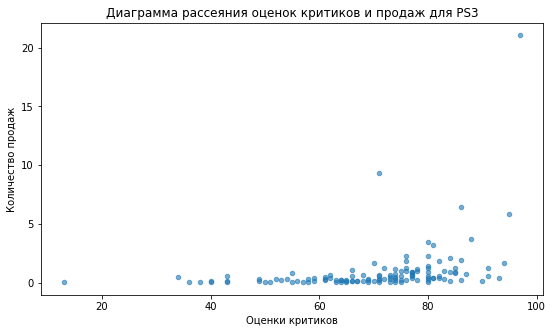

In [34]:
#Построим диаграмму рассеяния оценок критиков и продаж для платформы PS3
df_actual.query('platform == "PS3"').plot(figsize=(9, 5), kind='scatter', x='critic_score', y='all_sales', alpha=0.6, xlabel='Оценки критиков', ylabel='Количество продаж', title='Диаграмма рассеяния оценок критиков и продаж для PS3');

In [35]:
PS3 = df_actual.query('platform == "PS3"')
PS3[['critic_score', 'all_sales', 'user_score']].corr()

,critic_score,all_sales,user_score
critic_score,1.000000,0.334285,0.599920
all_sales,0.334285,1.000000,0.002394
user_score,0.599920,0.002394,1.000000


Из диаграммы рассеяния оценок критиков и продаж для платформы PS3 мы видим, что небольшая зависимость между этими величинами, кореляция данных величин равна 0.33

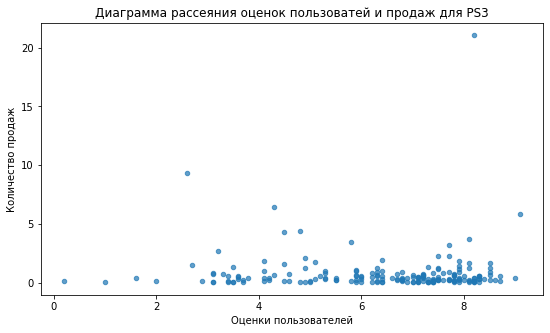

In [36]:
#Построим диаграмму рассеяния оценок пользователей и продаж для платформы PS3
df_actual.query('platform == "PS3"').plot(figsize=(9, 5), kind='scatter', x='user_score', y='all_sales', alpha=0.7, xlabel='Оценки пользователей', ylabel='Количество продаж', title='Диаграмма рассеяния оценок пользоватей и продаж для PS3');

Из диаграммы рассеяния оценок пользователей и продаж для платформы PS3 видно что между ними нет зависимости, кореляция данных величин равна 0

In [37]:
#Построим диаграмму рассеяния оценок критиков и продаж для платформы PS4
PS4 = df_actual.query('platform == "PS4"')
PS4[['critic_score', 'all_sales', 'user_score']].corr()

,critic_score,all_sales,user_score
critic_score,1.000000,0.406568,0.557654
all_sales,0.406568,1.000000,-0.031957
user_score,0.557654,-0.031957,1.000000


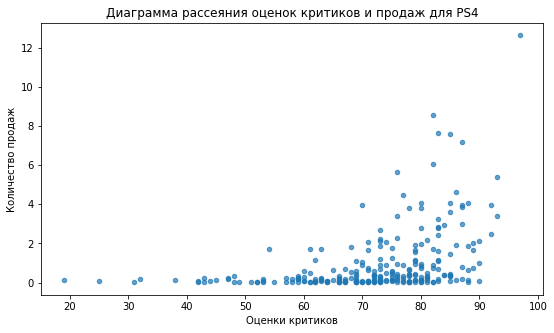

In [38]:
PS4.plot(figsize=(9, 5), kind='scatter', x='critic_score', y='all_sales', alpha=0.7, xlabel='Оценки критиков', ylabel='Количество продаж', title='Диаграмма рассеяния оценок критиков и продаж для PS4');

Из диаграмм рассеяния оценок критиков и продаж видно, что между этими величинами есть небольшая зависимость, кореляция равна 0.4

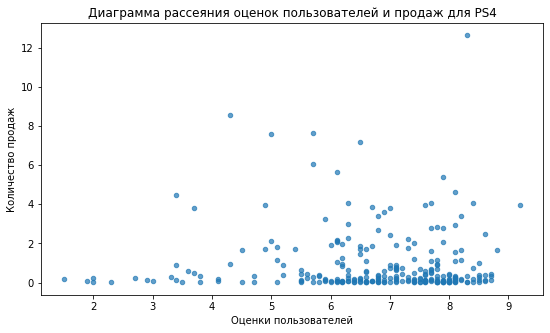

In [39]:
PS4.plot(figsize=(9, 5), kind='scatter', x='user_score', y='all_sales', alpha=0.7, xlabel='Оценки пользователей', ylabel='Количество продаж', title='Диаграмма рассеяния оценок пользователей и продаж для PS4');

Из диаграмм рассеяния оценок пользователей и продаж видно, что между этими величинами нет зависисимости, кореляция равна -0.03

In [40]:
#Построим диаграмму рассеяния оценок критиков и продаж для платформы X360
X360 = df_actual.query('platform == "X360"')
X360[['critic_score', 'all_sales', 'user_score']].corr()

,critic_score,all_sales,user_score
critic_score,1.000000,0.350345,0.520946
all_sales,0.350345,1.000000,-0.011742
user_score,0.520946,-0.011742,1.000000


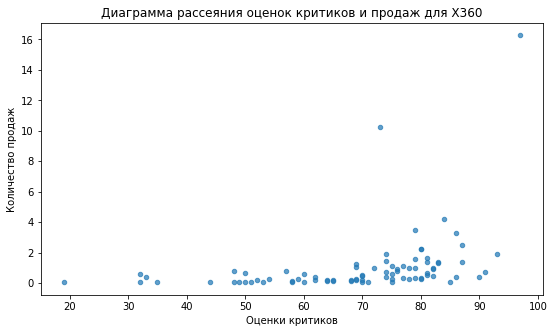

In [41]:
X360.plot(figsize=(9, 5), kind='scatter', x='critic_score', y='all_sales', alpha=0.7, xlabel='Оценки критиков', ylabel='Количество продаж', title='Диаграмма рассеяния оценок критиков и продаж для X360');

Из диаграммы рассеяния оценок критиков и продаж для платформы Х360 видно что между ними есть небольшая зависимость, кореляция данных величин равна 0.35

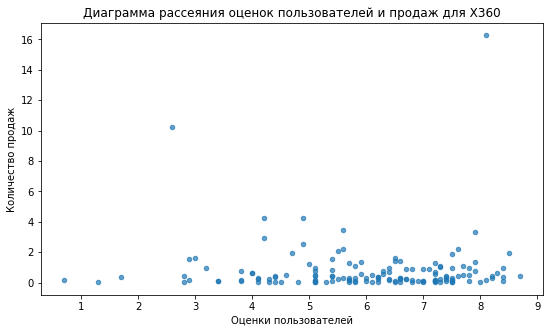

In [42]:
X360.plot(figsize=(9, 5), kind='scatter', x='user_score', y='all_sales', alpha=0.7, xlabel='Оценки пользователей', ylabel='Количество продаж', title='Диаграмма рассеяния оценок пользователей и продаж для X360');

Из диаграммы рассеяния оценок пользователей и продаж для платформы X360 видно что между ними нет зависимости, кореляция данных величин равна 0

In [43]:
#Построим диаграмму рассеяния оценок критиков и продаж для платформы XOne, а также рассчитаем кореляцию для данных величин
xone = df_actual.query('platform == "XOne"')
xone[['critic_score', 'all_sales', 'user_score']].corr()

,critic_score,all_sales,user_score
critic_score,1.000000,0.416998,0.472462
all_sales,0.416998,1.000000,-0.068925
user_score,0.472462,-0.068925,1.000000


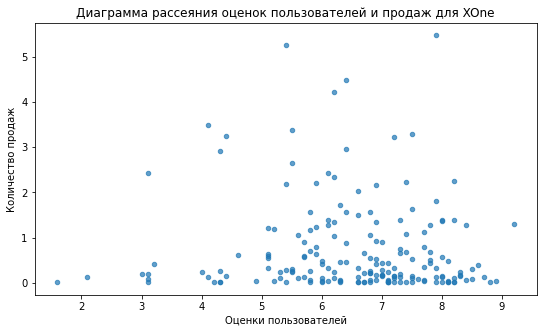

In [44]:
xone.plot(figsize=(9, 5), kind='scatter', x='user_score', y='all_sales', alpha=0.7, xlabel='Оценки пользователей', ylabel='Количество продаж', title='Диаграмма рассеяния оценок пользователей и продаж для XOne');

Из диаграммы рассеяния оценок пользователей и продаж для платформы XOne видно что между ними нем нет зависимости, кореляция равна -0.06

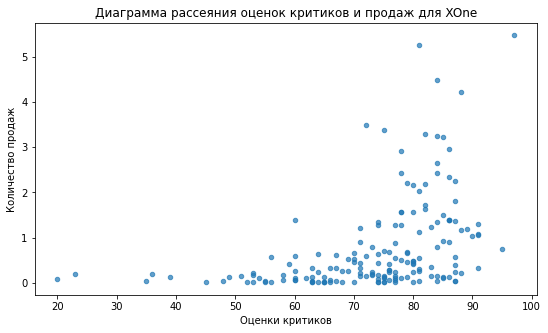

In [45]:
xone.plot(figsize=(9, 5), kind='scatter', x='critic_score', y='all_sales', alpha=0.7, xlabel='Оценки критиков', ylabel='Количество продаж', title='Диаграмма рассеяния оценок критиков и продаж для XOne');

Из диаграммы рассеяния оценок критиков и продаж для платформы XOne видим, что меджу эими величинами есть небольшая зависимость, кореляция равна 0.41

#### Вывод: мы построили диаграммы зависимости оценок  критиков и пользователей к продажам и рассчитали кореляцю этих величин для платформ PS3, PS4, X360, XOne и выяснили, что оценки пользователей не влияют на продажи, а оценки критиков влияют с кореляцией примерно 0.4

### Посмотрим на общее распределение игр по жанрам, выясним выделяются ли какие-то жанры по продажам.

In [46]:
#Посмотрим распределение игр по жанрам
df_actual['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

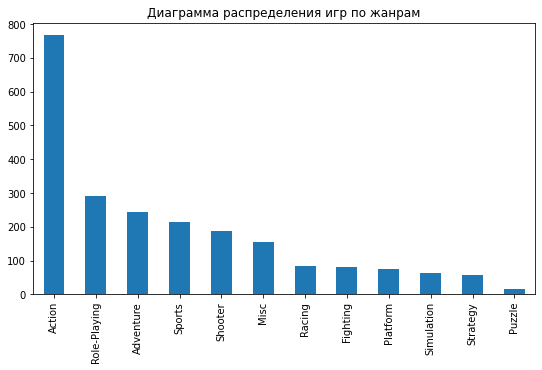

In [47]:
df_actual['genre'].value_counts().plot(kind='bar', title="Диаграмма распределения игр по жанрам", figsize=(9, 5));

Из диаграамы распределения игр по жанрам видно, что самый популярные жанры это Action, Role-Playing, Adventure, а самые не популярные жанры: Puzzle, Strategy, Simulation, platform, Fighting, Racing.

Теперь посмотрим на прибыльность жанров

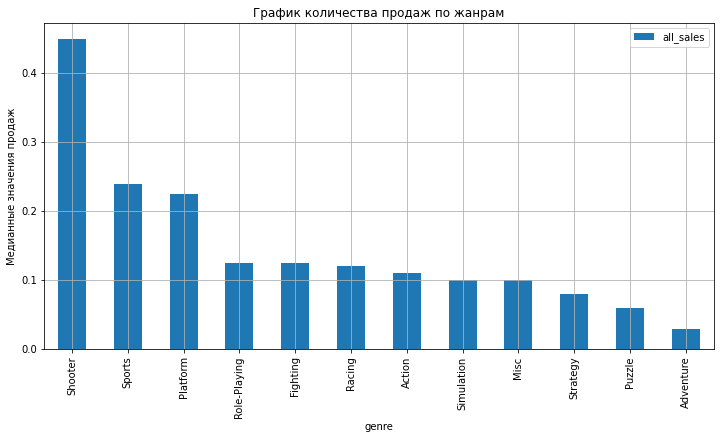

In [48]:
df_actual.groupby(['genre']).agg({'all_sales': 'median'}).sort_values(by='all_sales', ascending=False).plot(kind='bar', figsize=(12, 6), grid=True, ylabel='Медианные значения продаж', title='График количества продаж по жанрам');

Из графика медианных продаж по жанрам видим, что Shooter самый прибыльный жанр, далее идут Sports и Platform, a Adventure самый не прибыльный.

#### Вывод: из диаграамы распределения игр по жанрам видно, что самый популярные жанры это Action, Sports, Misc, Role-Playing, Shooter а самый непопулярные Puzzle, Strategy. Из графика продаж по жанрам, видим, что Shooter самый прибыльный жанр, далее идут Sports и Platform, a Adventure самый не прибыльный.

## Шаг 4. Составим портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

Text(0.5, 1.0, 'Япония')

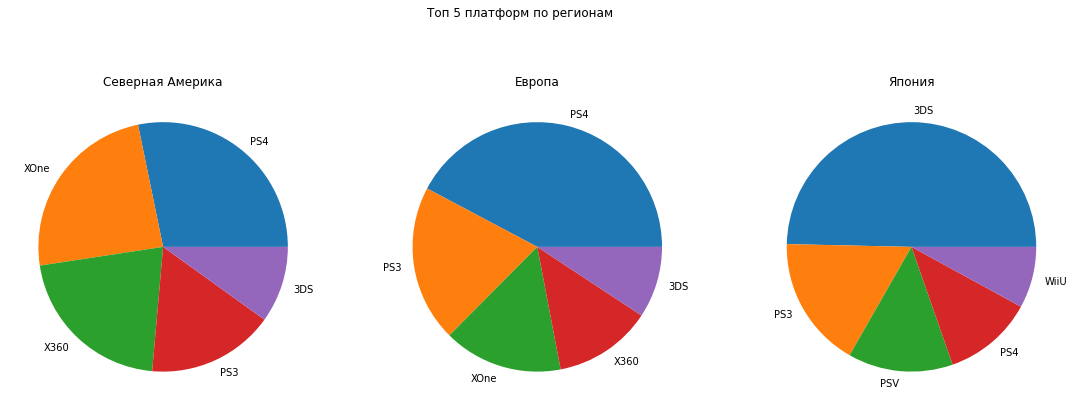

In [49]:
pna = df_actual.groupby(['platform']).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
peu = df_actual.groupby(['platform']).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
pjp = df_actual.groupby(['platform']).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()
pnapie = pna.loc[0:4,]
peupie = peu.loc[0:4,]
pjppie = pjp.loc[0:4,]

fig, axs = plt.subplots(1, 3, figsize=(19, 7))
plt.suptitle("Топ 5 платформ по регионам")
plt.subplot(1, 3, 1)
plt.pie(pnapie['na_sales'], labels=pnapie['platform'])
plt.title('Северная Америка')

plt.subplot(1, 3, 2)
plt.pie(peupie['eu_sales'], labels=peupie['platform'])
plt.title('Европа')

plt.subplot(1, 3, 3)
plt.pie(pjppie['jp_sales'], labels=pjppie['platform']);
plt.title('Япония')


- На графиках видно, что
    - топ 5 платформ  в Северной Америке это: X360, PS4, XOne, PS3, 3DS.
    - Топ 5 платформ  в Европе это: PS4, PS3, X360, XOne, 3DS.
    - Топ 5 платформ  в Японии это: 3DS, PS3, PSV, PS4, WiiU .
- Можем заметить, что Япония отличается предпочтениями по платформам.

### Самые популярные жанры.

Text(0.5, 1.0, 'Япония')

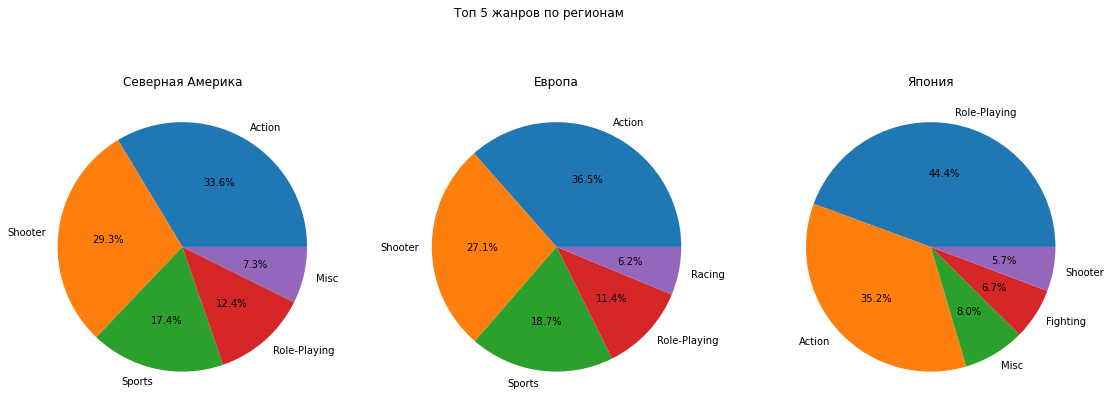

In [50]:
gna = df_actual.groupby(['genre']).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
geu = df_actual.groupby(['genre']).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
gjp = df_actual.groupby(['genre']).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()

gnapie = gna.loc[0:4]
geupie = geu.loc[0:4]
gjppie = gjp.loc[0:4]

fig, axs = plt.subplots(1, 3, figsize=(19, 7))
plt.suptitle("Топ 5 жанров по регионам")
plt.subplot(1, 3, 1)
plt.pie(gnapie['na_sales'], labels=gnapie['genre'], autopct='%1.1f%%')
plt.title('Северная Америка')

plt.subplot(1, 3, 2)
plt.pie(geupie['eu_sales'], labels=geupie['genre'], autopct='%1.1f%%')
plt.title('Европа')

plt.subplot(1, 3, 3)
plt.pie(gjppie['jp_sales'], labels=gjppie['genre'], autopct='%1.1f%%');
plt.title('Япония')

- На графиках видно, что
    - топ 5 жанров  в Северной Америке это: Action, Sport, Shooter, Role-Playing, Misc.
    - Топ 5 жанров  в Европе это: Action, Shooter, Sports, Role-Playing, Racing.
    - Топ 5 жанров  в Японии это: Role-Playing, Action, Misc, Flightning, Shooter.

### Самые популярные рейтинги игр.

/tmp/ipykernel_332/4263597968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['rating'] = df_actual['rating'].fillna(99)


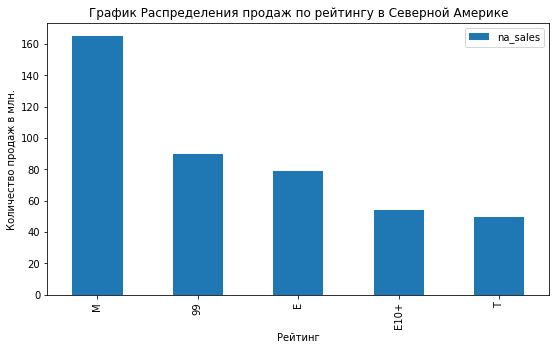

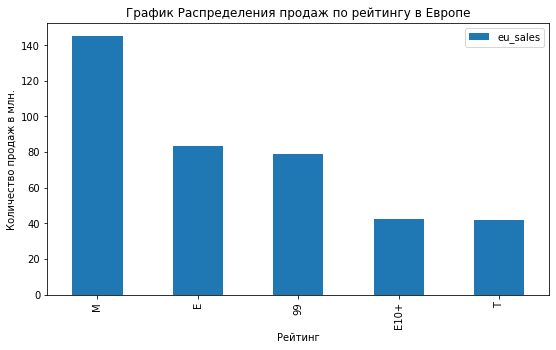

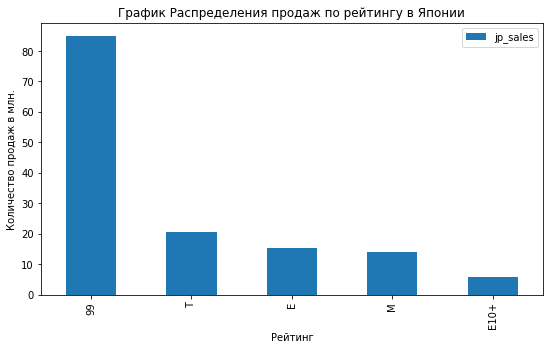

In [51]:
#Заполним пропуски в столбце рейтинг на значение 99
df_actual['rating'] = df_actual['rating'].fillna(99)
df_actual.groupby(['rating']).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(9,5,), xlabel='Рейтинг', ylabel='Количество продаж в млн.', title='График Распределения продаж по рейтингу в Северной Америке');
df_actual.groupby(['rating']).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(9,5), xlabel='Рейтинг', ylabel='Количество продаж в млн.', title='График Распределения продаж по рейтингу в Европе');
df_actual.groupby(['rating']).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).plot(kind='bar', figsize=(9,5), xlabel='Рейтинг', ylabel='Количество продаж в млн.', title='График Распределения продаж по рейтингу в Японии');

На графиках распределения продаж по рейтингу мы видим, что самые популярные рейтинги в NA и EU это M и Е , а в Японии доля продаж игр рейтинга М гораздо меньше чем в Европе и Северной Америке, зато игры без рейтинга пользуются наибольшей популярностью.

### Вывод: составив портреты пользователей по регионам, можно сказать, что топ 5 платформ в Северной Америке это: X360, PS4, XOne, PS3, 3DS.. Топ 5 платформ в Европе это: PS4, PS3, X360, XOne, 3DS. Топ 5 платформ в Японии это: 3DS, PS3, PSV, PS4, WiiU .Можем заметить, что Япония отличается предпочтениями по платформам. Топ 5 жанров в Северной Америке это: Action, Sport, Shooter, Role-Playing, Misc.Топ 5 жанров в Европе это: Action, Shooter, Sports, Role-Playing, Racing.Топ 5 жанров в Японии это: Role-Playing, Action, Misc, Flightning, Shooter. На графиках распределения продаж по рейтингу мы видим, что самые популярные рейтинги в NA и EU это M и Е , а в Японии доля продаж игр рейтинга М гораздо меньше чем в Европе и Северной Америке, зато игры без рейтинга пользуются наибольшей популярностью.



## Проверим гипотезы.

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны
- Альтернативная гипотеза:  средние пользовательские рейтинги платформ Xbox One и PC не равны


In [52]:
#Сделаем два датафрейма для платформ Xbox One и PC и уберем пропуски в столбце user_score
xone1 = df_actual.query('platform == "XOne"')
xone1 = xone1.dropna(subset=['user_score'])
pc = df_actual.query('platform == "PC"')
pc = pc.dropna(subset=['user_score'])

In [53]:
alpha = 0.05 #задаем уровень статистической значимости

# оценки пользователей для XOne
first_group_total = xone1['user_score']

# оценки пользователей для PC
second_group_total = pc['user_score']

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(first_group_total, second_group_total)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
print('Cреднее значение оценки пользователей XOne', xone1['user_score'].mean())
print('Cреднее значение оценки пользователей PC', pc['user_score'].mean())

p-value: 0.14012658403611647
Нет оснований отвергнуть нулевую гипотезу
Cреднее значение оценки пользователей XOne 6.521428571428572
Cреднее значение оценки пользователей PC 6.2696774193548395


Вывод: нулевую гипотезу о равенстве средних пользовательских рейтингах платформ XOne и PC не отвергаем

Проверим следующие гипотезы
- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action  и Sports  равны.
- Альтернативная гипоте: Средние пользовательские рейтинги жанров Action  и Sports не равны.

In [54]:
#Сделаем два датафрейма для жанров Action и Sports и уберем пропуски в столбце user_score
action = df_actual.query('genre == "Action"')
action = action.dropna(subset=['user_score'])
sports = df_actual.query('genre == "Sports"')
sports = sports.dropna(subset=['user_score'])

In [55]:
alpha = 0.05 #задаем уровень статистической значимости

# оценки пользователей для жанра Action
first_group_total1 = action['user_score']

# оценки пользователей для жанра Sports
second_group_total2 = sports['user_score']

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results2 = st.ttest_ind(first_group_total1, second_group_total2)

print(f'p-value: {results2.pvalue}')

# проверяем p-value
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
print('Cреднее значение оценки пользователей для жанра Action', action['user_score'].mean())
print('Cреднее значение оценки пользователей для жанра Sports', sports['user_score'].mean())

p-value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу
Cреднее значение оценки пользователей для жанра Action 6.837532133676092
Cреднее значение оценки пользователей для жанра Sports 5.238124999999999


Вывод: нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports отвергается. 
p-value: 1.0517832389140023e-27

### Вывод: гипотеза о  равенстве средних пользовательских рейтингах платформ XOne и PC  не отвергается, pvalue = 0.140. Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports  отвергается, pvalue = 1.0517832389140023e-27

## Общий вывод 
### На первом шаге мы считали данные, ознакомились с содержанием данных, посмотрели у каких столбцов нужно поменять тип данных.
### На втором этапе мы провели подготовку данных к анализу, а именно:привели названия столбцов к нижнему регистру, удалили строки, где не указанно название игры и жанр, привели столбец с датой к типу данный int, поменяли тип данных столбца оценки пользователей на float, проверили датафрейм на дупликаты и добавили столбец с сумарными продажами во всех регионах, изменили значения tbd на пропуски
### На третем этапе мы провели ИА и узнали,  что с 1990 по 2006-7 количество выпущенных игр в год активно росло, а с 2007 по 2015 пошел резкий спад. 
### На графике продаж игр по платформам видно, что явный лидер PS2 с продажами более 1200 млн, далее идет X360, PS3, Wii, DS, PS
###  Рассмотрели графики распределения продаж самых популярних платформ по годам и можем сказать, что платформа держит актуальность в среднем 5-6 лет, после чего появляется новая, а старая становится не актуальна.
###  Проанализировав графики за актуальный период 2013-2016г. мы выделили несколько новых платформ: PS4, XOne, 3DS и WiiU. Можно сказать, что платформа PS4 явный лидер по продажам, появившаяся в 2013 году, которая будет набирает свою популярность и будет актуальна до 2018-19 года. Платформа XOne также появилась в 2013 году и набирает свою популярность. Платформы: 3DS и WiiU, с каждым годом теряют продажи и скоро станут не актуальны.
### На графиках «ящик с усами» по глобальным продажам игр в разбивке по платформам, видим, что наивысшими медианными значениями обладнают платформы: X360, PS4, WiiU и XOne, а наименьшими платформы: PSV, PSP, 3DS, PC.
###  мы построили диаграммы зависимости оценок  критиков и пользователей к продажам и рассчитали кореляцю этих величин для платформ PS3, PS4, X360, XOne и выяснили, что оценки пользователей не влияют на продажи, а оценки критиков влияют с кореляцией примерно 0.4
### Из диаграамы распределения игр по жанрам видно, что самый популярные жанры это Action, Role-Playing, Adventure, а самые не популярные жанры: Puzzle, Strategy, Simulation, platform, Fighting, Racing. Из графика продаж по жанрам, видим что медианное значение продаж гороздо больше у шутеров.
### На четвертом этапе,  составив портреты пользователей по регионам, можно сказать, что топ 5 платформ в Северной Америке это: X360, PS4, XOne, PS3, 3DS.. Топ 5 платформ в Европе это: PS4, PS3, X360, XOne, 3DS. Топ 5 платформ в Японии это: 3DS, PS3, PSV, PS4, WiiU .Можем заметить, что Япония отличается предпочтениями по платформам. Топ 5 жанров в Северной Америке это: Action, Sport, Shooter, Role-Playing, Misc.Топ 5 жанров в Европе это: Action, Shooter, Sports, Role-Playing, Racing.Топ 5 жанров в Японии это: Role-Playing, Action, Misc, Flightning, Shooter. На графиках распределения продаж по рейтингу мы видим, что самые популярные рейтинги в NA и EU это M и Е , а в Японии доля продаж игр рейтинга М гораздо меньше чем в Европе и Северной Америке, зато игры без рейтинга пользуются наибольшей популярностью.
### На пятом этапе мы проверили гипотезы и выяснили, гипотеза о  равенстве средних пользовательских рейтингах платформ XOne и PC  не отвергается, pvalue = 0.140. Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports  отвергается, pvalue = 1.0517832389140023e-27

## Рекомендации отделу маркетинга сделать акцент на платформах PS4 и XOne.